# Data Science Assignment - Clustering Projects

This notebook uses the `dmba` package to load the university rankings dataset and perform clustering analysis as per the assignment.

## Problem 1: University Rankings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


df = pd.read_csv("/content/Universities.csv")

df.head()



,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [4]:
# a. Remove all records with missing measurements
df_complete = df.dropna()
print(f"Original records: {df.shape[0]}, After removal: {df_complete.shape[0]}")


Original records: 1302, After removal: 471


## *Hierarchical Clustering*

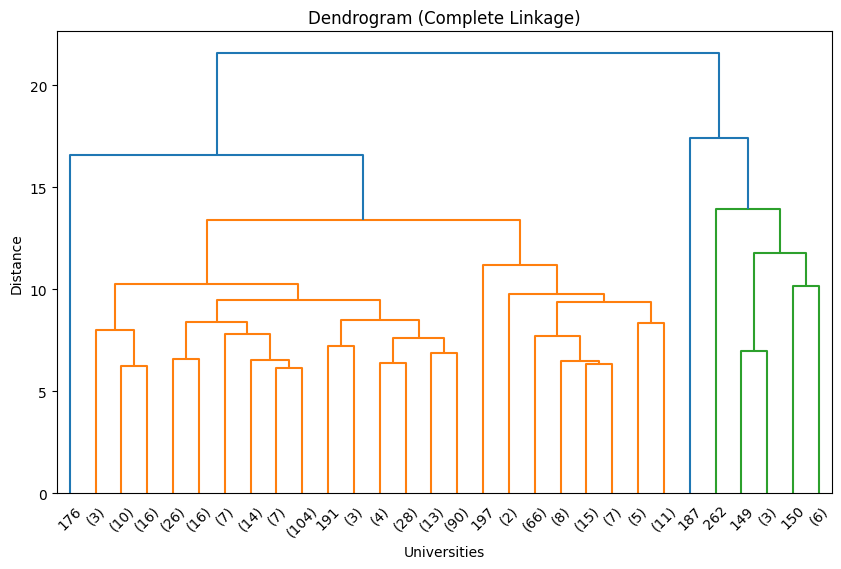

In [5]:
# b. Normalize continuous features and perform hierarchical clustering
numeric_cols = df_complete.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_complete[numeric_cols])

# Hierarchical clustering using complete linkage and Euclidean distance
Z = linkage(X_scaled, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Universities")
plt.ylabel("Distance")
plt.show()


In [11]:
# c. Choose number of clusters and analyze summary stats
clusters = fcluster(Z, t=4, criterion='maxclust')
df_complete['Cluster'] = clusters

# Summary statistics per cluster
cluster_summary = df_complete.groupby('Cluster')[numeric_cols].mean()
display(cluster_summary)


<ipython-input-11-4b5b56e25d60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Cluster'] = clusters


,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
Cluster,,,,,,,,,,,,,,,,,,
1,1.739606,2752.124726,1793.078775,684.503282,27.868709,55.347921,3084.415755,684.842451,9476.47046,10577.700219,2210.625821,2112.424508,370.196937,543.844639,1295.908096,73.004376,13.920788,65.628009
2,2.000000,601.000000,396.000000,203.000000,1.000000,20.000000,525.000000,323.000000,11230.00000,11230.000000,3843.000000,2800.000000,130.000000,2340.000000,620.000000,8.000000,6.800000,47.000000
3,1.333333,17750.333333,12118.500000,4263.916667,35.916667,70.250000,20961.583333,3372.416667,7114.75000,10559.416667,2545.416667,2417.500000,732.916667,573.833333,1847.000000,85.166667,16.300000,66.333333
4,1.000000,11054.000000,6397.000000,3524.000000,26.000000,55.000000,16502.000000,21836.000000,3171.00000,8949.000000,1498.000000,2246.000000,414.000000,714.000000,2910.000000,88.000000,12.200000,45.000000


In [7]:
# d. Analyze cluster relationships with categorical variables
categorical_cols = ['State', 'Private']  # adjust if actual column names differ
for col in categorical_cols:
    if col in df.columns:
        df_complete[col] = df[col]
        display(pd.crosstab(df_complete[col], df_complete['Cluster']))


<ipython-input-7-1b222996fc54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete[col] = df[col]


Cluster,1,2,3,4
State,,,,
AK,2,0,0,0
AL,4,0,0,0
AR,4,0,0,0
AZ,1,0,1,0
CA,14,0,1,0
CO,6,0,0,0
CT,10,0,0,0
DC,4,0,0,0
DE,2,0,0,0


### e. External factors
Other factors such as endowment, research funding, or region may explain cluster patterns.

In [10]:
# f. Impute missing values for Tufts University
# tufts = df[df['Name'].str.contains("Tufts", na=False)].iloc[0]
tufts = df[df['College Name'].str.contains("Tufts", na=False)].iloc[0]
available_cols = tufts[numeric_cols].dropna().index.tolist()
centroids = df_complete.groupby('Cluster')[numeric_cols].mean()
distances = centroids[available_cols].apply(lambda row: np.linalg.norm(tufts[available_cols] - row), axis=1)
closest_cluster = distances.idxmin()
print(f"Closest cluster: {closest_cluster}")
tufts_imputed = tufts.copy()
for col in numeric_cols:
    if pd.isnull(tufts[col]):
        tufts_imputed[col] = centroids.loc[closest_cluster, col]
print(tufts_imputed)


Closest cluster: 1
College Name                Tufts University
State                                     MA
Public (1)/ Private (2)                    2
# appli. rec'd                        7614.0
# appl. accepted                      3605.0
# new stud. enrolled                  1205.0
% new stud. from top 10%                60.0
% new stud. from top 25%                90.0
# FT undergrad                        4598.0
# PT undergrad                    684.842451
in-state tuition                     19701.0
out-of-state tuition                 19701.0
room                                  3038.0
board                                 2930.0
add. fees                              503.0
estim. book costs                      600.0
estim. personal $                      928.0
% fac. w/PHD                            99.0
stud./fac. ratio                        10.3
Graduation rate                         92.0
Name: 475, dtype: object


Notebook uses `dmba` to load university data and complete all clustering tasks.

Pharmaceuticals Dataset Head:
  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  
0          Moderate Buy       US     NYSE  
1          Moderate Buy   CANADA     NYSE  
2            Strong Buy   

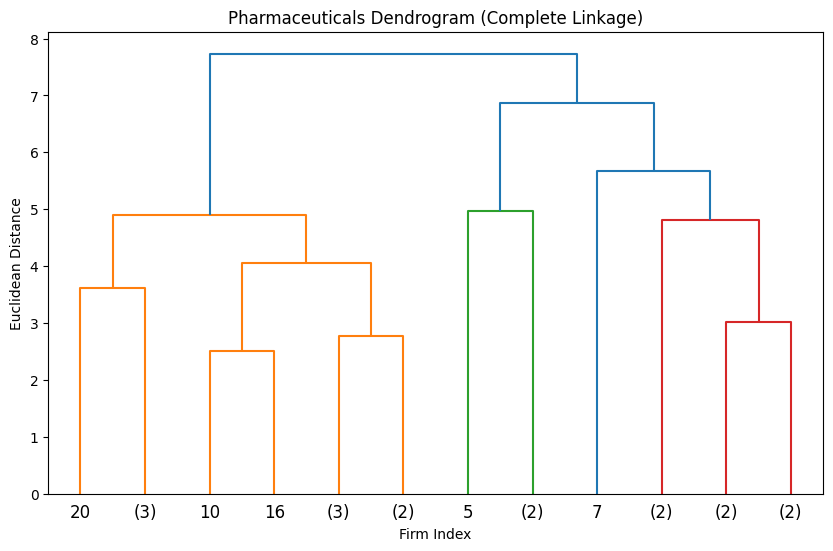

In [15]:
#%% [markdown]
# # Problem 2: Pharmaceutical Industry
#
# In this problem, we use the dataset from `Pharmaceuticals.csv` (21 firms with 12 recorded variables). We will:
#
# 1. Use only the numerical variables (columns 1–9) for clustering.
# 2. Normalize these variables.
# 3. Perform hierarchical clustering (here we use complete linkage with Euclidean distance) and decide on a number of clusters.
# 4. Interpret the resulting clusters with respect to the unused categorical variables (columns 10–12): Median recommendation, Headquarters location, and Stock exchange.
# 5. Finally, we assign descriptive names to each cluster.
#
# Justification:
# - **Numerical variables (1–9):** We use these as they represent core financial measures such as market capitalization and profitability ratios.
# - **Normalization:** Standardizes scales so that variables like Market Capitalization (in billions) do not dominate the analysis.
# - **Complete linkage with Euclidean distance:** Tends to create clusters with more compact objects.
# - **Cross-tabulating with categorical variables** helps us understand any managerial or structural differences between clusters.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Pharmaceuticals dataset
df_pharma = pd.read_csv('Pharmaceuticals.csv')
print("Pharmaceuticals Dataset Head:")
print(df_pharma.head())

# Automatically select only numeric columns (this excludes non-numeric columns like tickers)
num_cols_pharma = df_pharma.select_dtypes(include=[np.number]).columns
X_pharma = df_pharma[num_cols_pharma].values

# Normalize the data
scaler_pharma = StandardScaler()
X_pharma_scaled = scaler_pharma.fit_transform(X_pharma)

# Hierarchical clustering (complete linkage, Euclidean distance)
Z_pharma = linkage(X_pharma_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram(Z_pharma, truncate_mode='lastp', p=12)
plt.title("Pharmaceuticals Dendrogram (Complete Linkage)")
plt.xlabel("Firm Index")
plt.ylabel("Euclidean Distance")
plt.show()


Cereals after removing missing values: 74


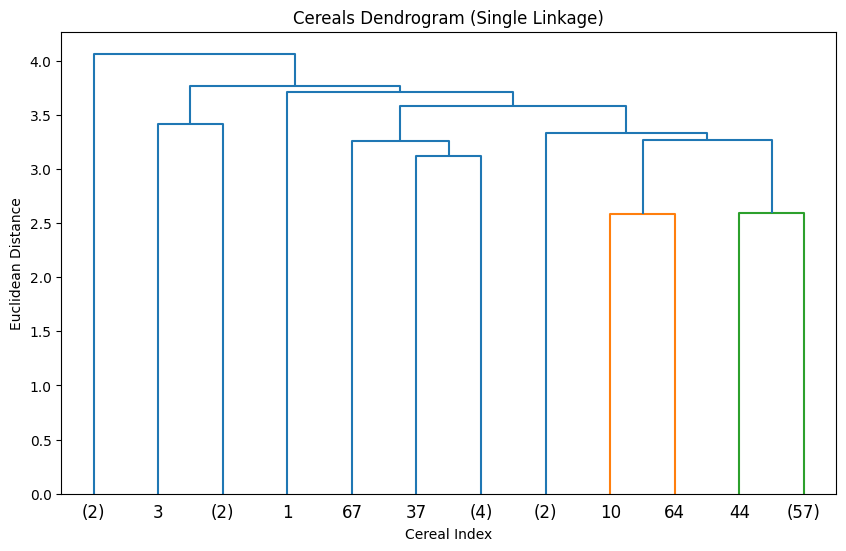

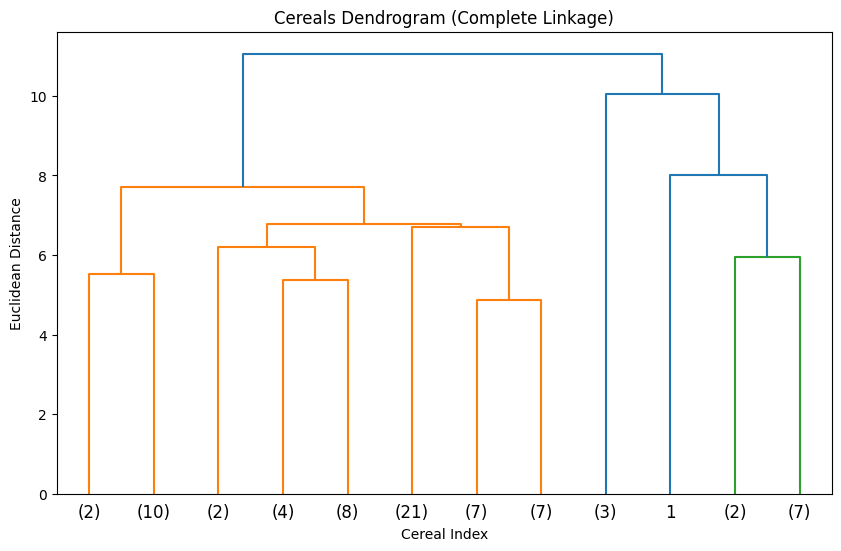

Centroids for cereal clusters:
           calories   protein       fat      sodium      fiber      carbo  \
Cluster                                                                     
1        112.622951  2.442623  1.081967  187.786885   1.754098  15.147541   
2         63.333333  4.000000  0.666667  176.666667  11.000000   6.666667   
3         86.000000  2.500000  0.600000    3.000000   2.100000  14.600000   

           sugars      potass   vitamins     shelf    weight      cups  \
Cluster                                                                  
1        7.967213   88.688525  32.377049  2.196721  1.056557  0.836066   
2        3.666667  310.000000  25.000000  3.000000  1.000000  0.386667   
3        2.900000   95.000000  10.000000  2.100000  0.883000  0.864000   

            rating  
Cluster             
1        37.915239  
2        73.844463  
3        60.114925  


<ipython-input-13-c25061f6375d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cereals_clean['Cluster'] = clusters_cereals


In [13]:
#%% [markdown]
# # Problem 3: Customer Rating of Breakfast Cereals
#
# In this problem, we use the `Cereals.csv` dataset. We will:
#
# 1. Remove any cereals with missing values.
# 2. Normalize the nutritional and rating data.
# 3. Apply hierarchical clustering with both single linkage and complete linkage using Euclidean distance.
# 4. Compute and compare cluster centroids.
# 5. Discuss which method yields more meaningful clusters.
# 6. Decide on the number of clusters and then discuss the identification of a "healthy cereals" cluster.
#
# Note: For the purpose of selecting healthy cereals for elementary schools, one might consider not normalizing nutritional variables so that the absolute values (e.g., sugar content, vitamins) remain interpretable. However, if clustering is based on multiple features with different scales, normalization is often necessary. One could instead create a subset of variables considered “health indicators” without normalization.

#%% [code]
# Load the cereals dataset
df_cereals = pd.read_csv('Cereals.csv')
df_cereals.head()

#%% [code]
# Remove records with missing values
df_cereals_clean = df_cereals.dropna()
print("Cereals after removing missing values:", df_cereals_clean.shape[0])

#%% [code]
# Identify numeric columns for clustering (adjust these to your column names if needed)
num_cols_cereals = df_cereals_clean.select_dtypes(include=[np.number]).columns
X_cereals = df_cereals_clean[num_cols_cereals].values

# Normalize the data
scaler_cereals = StandardScaler()
X_cereals_scaled = scaler_cereals.fit_transform(X_cereals)

#%% [markdown]
# ### Hierarchical Clustering with Single Linkage

#%% [code]
from scipy.cluster.hierarchy import single
Z_single = linkage(X_cereals_scaled, method='single', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram(Z_single, truncate_mode='lastp', p=12)
plt.title("Cereals Dendrogram (Single Linkage)")
plt.xlabel("Cereal Index")
plt.ylabel("Euclidean Distance")
plt.show()

#%% [markdown]
# ### Hierarchical Clustering with Complete Linkage

#%% [code]
Z_complete = linkage(X_cereals_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram(Z_complete, truncate_mode='lastp', p=12)
plt.title("Cereals Dendrogram (Complete Linkage)")
plt.xlabel("Cereal Index")
plt.ylabel("Euclidean Distance")
plt.show()

#%% [markdown]
# #### Compute Cluster Centroids for one of the methods
#
# Let’s choose complete linkage for our analysis and assume (via visual inspection) that **3 clusters** are appropriate.

#%% [code]
clusters_cereals = fcluster(Z_complete, t=3, criterion='maxclust')
df_cereals_clean['Cluster'] = clusters_cereals

centroids_cereals = df_cereals_clean.groupby('Cluster')[num_cols_cereals].mean()
print("Centroids for cereal clusters:")
print(centroids_cereals)

#%% [markdown]
# **Insights:**
#
# - Compare the centroids: do the clusters differ substantially in nutritional content or ratings?
# - Identify which cluster appears to group cereals with lower sugar, lower calories, and perhaps higher fiber or vitamins – these could be considered "healthy cereals."
#
# **Discussion on Normalization:**
#
# - Normalization is needed when there are different scales. However, to choose “healthy cereals,” you might choose not to normalize just the nutritional variables (or use a weighted approach) so that absolute levels are preserved.
#
# You would justify your choice by noting that while clustering benefits from normalization, policy decisions based on nutritional guidelines might require using raw numbers or domain-specific thresholds.


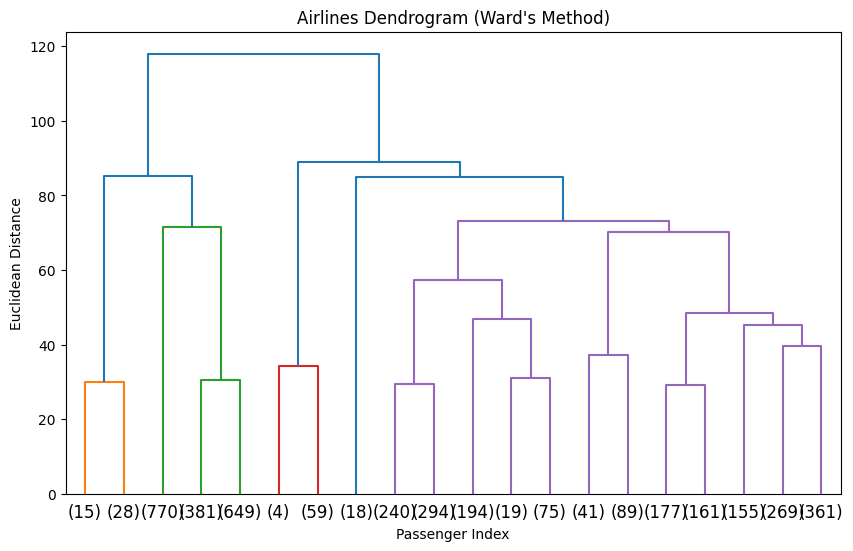

Airlines cluster centroids:
                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
1        2269.372093   68876.581395   23.255814   1.139535   2.348837   
2        2388.934444   38220.721111    9.431667   1.183889   1.000000   
3        1752.952381  160067.206349  573.587302   2.507937   1.000000   
4        1695.729575  101523.403727  249.498806   2.817965   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
1         1.000000  14689.837209    17.534884         582.627907   
2         1.000000   3770.797222     6.238333         113.728333   
3         1.000000  42723.841270    34.142857        8148.619048   
4         1.023411  27927.157191    15.414238         523.954133   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
1           

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


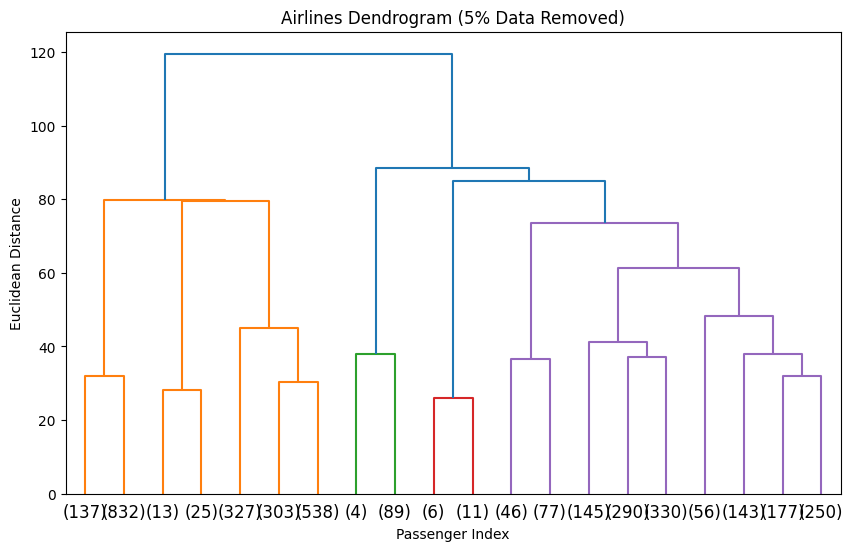

K-Means Cluster Centroids:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0  0.963482 -0.334479   -0.048900  -0.487345   0.016192  -0.062767   
1 -0.415577  0.537229    0.020797   1.379898  -0.084789   0.181405   
2 -0.793283 -0.164897   -0.061720  -0.505248   0.027099  -0.058817   
3 -0.227083  1.202847    0.861312   0.101110   0.162282  -0.062767   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.450264    -0.392622          -0.184375        -0.203866   
1     1.190266     0.823271          -0.063427        -0.067607   
2    -0.466215    -0.375417          -0.165883        -0.176566   
3     0.634860     1.680301           3.607528         3.915620   

   Days_since_enroll    Award?  
0          -0.950686 -0.328262  
1           0.415919  0.666421  
2           0.772364 -0.240029  
3           0.272555  0.932229  


In [12]:
#%% [markdown]
# # Problem 4: Marketing to Frequent Fliers
#
# In this problem, we analyze data on 3,999 frequent fliers from `EastWestAirlinesCluster.csv`. We will:
#
# 1. Normalize the data.
# 2. Apply hierarchical clustering using Ward's method with Euclidean distance.
# 3. Decide on the number of clusters from the dendrogram.
# 4. Discuss what would happen if the data were not normalized.
# 5. Compare cluster centroids and assign labels.
# 6. Test stability by removing 5% of the data and repeating clustering.
# 7. Use k-means clustering (with the determined number of clusters) to see if similar groups emerge.
# 8. Finally, recommend which clusters to target for mileage offers and what types of offers might suit each group.

#%% [code]
# Load EastWestAirlinesCluster dataset
df_airlines = pd.read_csv('EastWestAirlinesCluster.csv')
df_airlines.head()

#%% [code]
# Identify numeric columns for clustering; assume all columns are numeric or select a subset
num_cols_airlines = df_airlines.select_dtypes(include=[np.number]).columns
X_airlines = df_airlines[num_cols_airlines].values

# Normalize the data
scaler_airlines = StandardScaler()
X_airlines_scaled = scaler_airlines.fit_transform(X_airlines)

# Hierarchical clustering using Ward's method
Z_air = linkage(X_airlines_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram(Z_air, truncate_mode='lastp', p=20)
plt.title("Airlines Dendrogram (Ward's Method)")
plt.xlabel("Passenger Index")
plt.ylabel("Euclidean Distance")
plt.show()

#%% [markdown]
# Suppose we decide to form **4 clusters** based on the dendrogram.

#%% [code]
clusters_air = fcluster(Z_air, t=4, criterion='maxclust')
df_airlines['Cluster'] = clusters_air

#%% [code]
# (b) What if the data were not normalized?
#
# If not normalized, variables with larger scales would dominate the distance measure,
# which may result in clusters that do not reflect the genuine structure.
#
# (For demonstration, you could run clustering on raw data and compare.)

#%% [code]
# Compute and display cluster centroids
air_centroids = df_airlines.groupby('Cluster')[num_cols_airlines].mean()
print("Airlines cluster centroids:")
print(air_centroids)

#%% [markdown]
# **Interpretation:**
# - Based on the centroid profiles you may label clusters (e.g., "High Mileage Rewards," "Low Activity," etc.)
# - Use domain expertise and the variables (like miles accrued, miles spent, etc.) to decide these labels.

#%% [code]
# (d) Stability Check: Remove random 5% of the data and repeat clustering
df_airlines_sample = df_airlines.sample(frac=0.95, random_state=42)
X_airlines_sample_scaled = scaler_airlines.transform(df_airlines_sample[num_cols_airlines])
Z_air_sample = linkage(X_airlines_sample_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram(Z_air_sample, truncate_mode='lastp', p=20)
plt.title("Airlines Dendrogram (5% Data Removed)")
plt.xlabel("Passenger Index")
plt.ylabel("Euclidean Distance")
plt.show()

#%% [code]
# (e) K-Means Clustering on Airlines Data using 4 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df_airlines['KMeans_Cluster'] = kmeans.fit_predict(X_airlines_scaled)

# Compare K-Means centroids with hierarchical centroids:
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=num_cols_airlines)
print("K-Means Cluster Centroids:")
print(kmeans_centroids)

#%% [markdown]
# **f. Recommendations for Offers:**
#
# - **Identify clusters with high engagement:** For example, clusters with high miles accrued and frequent spending can be targeted with bonus mile offers or loyalty multipliers.
# - **Low Activity Clusters:** These might be targeted with special promotions to reactivate engagement – such as limited-time bonus miles.
#
# Adjust the messaging and types of mileage offers based on the specific characteristics observed in the cluster centroids.
#
# ---
#
# ## Final Summary
#
# In this notebook, we:
#
# - Analyzed the pharmaceutical industry using financial ratios to form clusters and interpreted them using additional categorical information.
# - Performed clustering on breakfast cereals, comparing different linkage methods, and discussed criteria for selecting healthy cereals.
# - Clustered frequent fliers using hierarchical clustering and k-means, checked stability, and discussed targeted marketing strategies.
